In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
train_data=pd.read_csv('/content/train_v9rqX0R.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train_data.shape

(8523, 12)

In [4]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# **Handling Missing values**

In [8]:
mode_of_Outlet_size = train_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [9]:
missing_values = train_data['Outlet_Size'].isnull()
train_data.loc[missing_values, 'Outlet_Size'] = train_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x]) 

In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
item_avg_weight = train_data.groupby(["Item_Identifier"])["Item_Weight"].mean()
item_avg_weight


Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [12]:
missing_values_we = train_data['Item_Weight'].isnull() 
train_data.loc[missing_values_we,'Item_Weight'] = train_data.loc[missing_values_we,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])

In [13]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
train_data=train_data.dropna()
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# **Visualizing data**

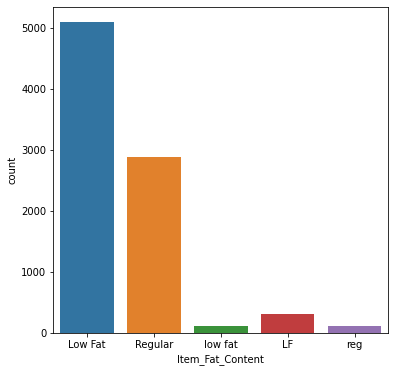

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.show()

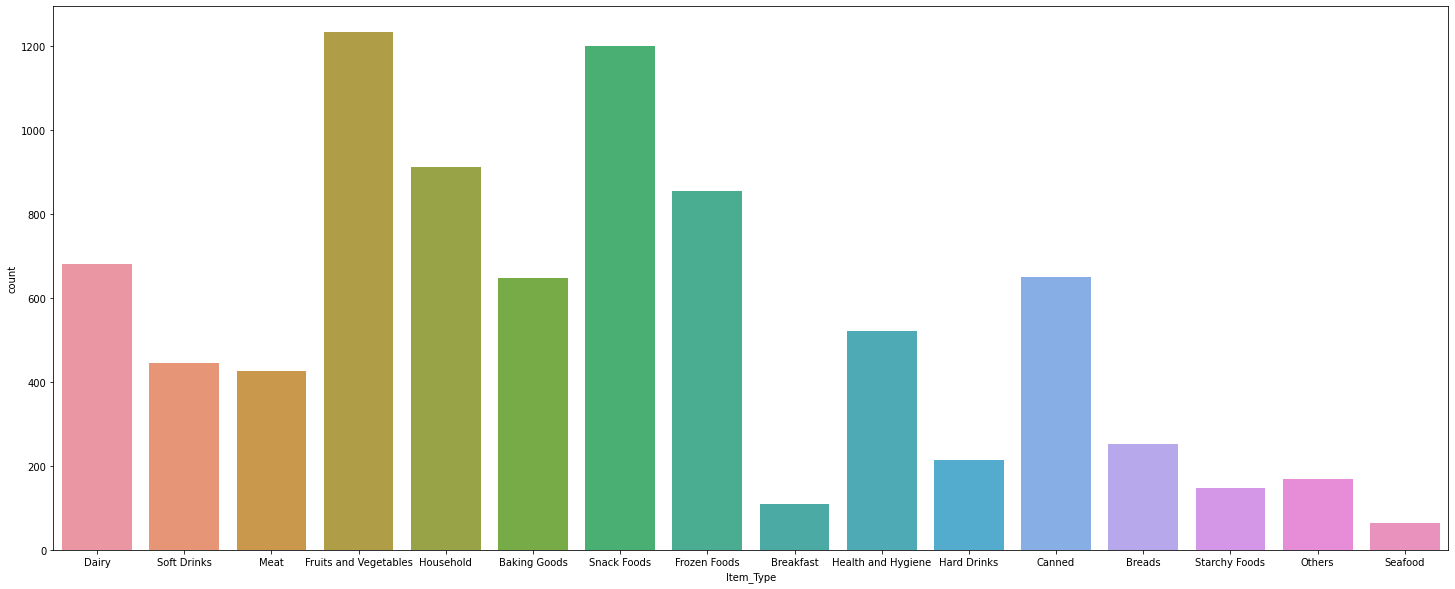

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x='Item_Type', data=train_data)
plt.show()

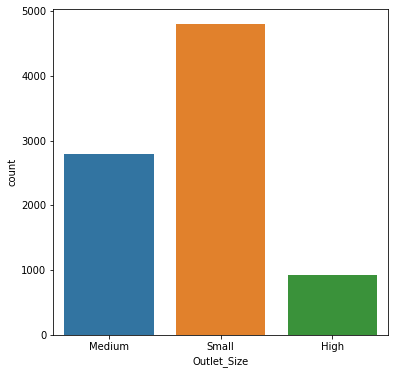

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=train_data)
plt.show()

In [18]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
train_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [20]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [21]:
encoder = LabelEncoder()
train_data['Item_Identifier'] = encoder.fit_transform(train_data['Item_Identifier'])
train_data['Item_Fat_Content'] = encoder.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type'] = encoder.fit_transform(train_data['Item_Type'])
train_data['Outlet_Identifier'] = encoder.fit_transform(train_data['Outlet_Identifier'])
train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type'] = encoder.fit_transform(train_data['Outlet_Type'])

In [22]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,660,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1117,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1293,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [23]:
X = train_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = train_data['Item_Outlet_Sales']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
#LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)
y_pred

array([1938.01182454, 1865.5860626 ,   56.36911994, ..., 1624.30615133,
       1239.57106232, 2327.93677604])

In [28]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.5159133815046082

In [34]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [35]:
y_pred=regressor.predict(X_test)
y_pred

array([2441.08912, 1412.8276 ,  267.3187 , ..., 1590.86252,  241.61882,
       1918.03664])

In [36]:
r2_score(Y_test,y_pred)

0.5375829993956424

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
DecisionTree.fit(X_train, Y_train) 
DecisionTree_prediction = DecisionTree.predict(X_test)

In [30]:
#XGBRegressor
from xgboost import XGBRegressor
regressor_final = XGBRegressor()

In [31]:
regressor_final.fit(X_train, Y_train)

[10:10:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [32]:
training_data_prediction = regressor_final.predict(X_train)

In [33]:
from sklearn import metrics
r2_train = metrics.r2_score(Y_train, training_data_prediction)
r2_train

0.6325065372851001

In [38]:
test_data=pd.read_csv('/content/test_AbJTz2l.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [39]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [40]:
mode_of_Outlet_size_test = test_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size_test)
missing_values = test_data['Outlet_Size'].isnull()
test_data.loc[missing_values, 'Outlet_Size'] = test_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size_test[x]) 

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [41]:
item_avg_weight = test_data.groupby(["Item_Identifier"])["Item_Weight"].mean()
missing_values_we = test_data['Item_Weight'].isnull() 
test_data.loc[missing_values_we,'Item_Weight'] = test_data.loc[missing_values_we,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])

In [42]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean()) #filling with median
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [43]:
test_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [44]:
encoder = LabelEncoder()
test_data['Item_Identifier'] = encoder.fit_transform(test_data['Item_Identifier'])
test_data['Item_Fat_Content'] = encoder.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Type'] = encoder.fit_transform(test_data['Item_Type'])
test_data['Outlet_Identifier'] = encoder.fit_transform(test_data['Outlet_Identifier'])
test_data['Outlet_Size'] = encoder.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type'] = encoder.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type'] = encoder.fit_transform(test_data['Outlet_Type'])

In [45]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,13.600,1,0.118599,4,234.2300,5,1985,1,2,3


In [50]:
test_data_prediction=regressor_final.predict(test_data)
test_data_prediction

array([1674.14  , 1423.4606,  608.6474, ..., 1891.1162, 3670.728 ,
       1284.2758], dtype=float32)

In [51]:
submission=pd.read_csv('/content/sample_submission_8RXa3c6.csv')
submission['Item_Outlet_Sales'] = test_data_prediction
submission.to_csv('./submission_rose.csv',index=False)
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1674.140015
1,FDW14,OUT017,1423.460571
2,NCN55,OUT010,608.647400
3,FDQ58,OUT017,2479.019043
4,FDY38,OUT027,6142.299805


In [54]:
DecisionTree_prediction = DecisionTree.predict(test_data)
DecisionTree_prediction

array([1750.3450463 , 1421.23024259,  548.28496305, ..., 1841.4072873 ,
       3708.65834407, 1421.23024259])

In [55]:
submission=pd.read_csv('/content/sample_submission_8RXa3c6.csv')
submission['Item_Outlet_Sales'] = DecisionTree_prediction
submission.to_csv('./submission_decision.csv',index=False)
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1750.345046
1,FDW14,OUT017,1421.230243
2,NCN55,OUT010,548.284963
3,FDQ58,OUT017,2305.143319
4,FDY38,OUT027,5873.700404
